In [2]:
import os
import numpy as np
import h5py
import matplotlib.pyplot as plt
import nibabel as nib
import pandas as pd

In [11]:
crop_fiji0 = r"C:\Users\danie\Documents\Master\TFM\notebooks\crop0_fiji.h5"
crop_0 = r"C:\Users\danie\Documents\Master\TFM\images\allCells_crops\20190401_E2\crop0\20190401_E2_DAPI_x1116to1352_y315to551_z337to539_decon.nii.gz"

In [36]:
crop_fiji_1 = r"C:\Users\danie\Documents\Master\TFM\notebooks\crop1_fiji.h5"
crop_1 = r"C:\Users\danie\Documents\Master\TFM\images\allCells_crops\20190401_E2\crop1\20190401_E2_DAPI_x1116to1352_y315to551_z72to274_decon.nii.gz"

In [39]:
prob_1 = r"C:\Users\danie\Documents\Master\TFM\notebooks\crop1_fiji_Probabilities.h5"
seg_0 =  r"C:\Users\danie\Documents\Master\TFM\notebooks\crop0_fiji-data_Simple Segmentation.h5" 

In [51]:
plant = "/Users/dvarelat/Documents/MASTER/TFM/methods/plantseg/Movie1_t00006_crop_gt.h5"

In [37]:
print(os.path.isfile(crop_fiji_1))
print(os.path.isfile(crop_1))

True
True


### LEER H5 FILE

In [52]:
f = h5py.File(plant, 'r')

In [53]:
list(f.keys())

['label', 'raw']

In [62]:
data= np.array(f["raw"])
label = np.array(f["label"])
data.shape

(486, 620, 1330)

In [64]:
data = data[:,:,:]
label = label[:,:,:]


<Figure size 1440x1440 with 0 Axes>

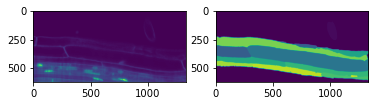

In [76]:
n = 300
plt.figure(figsize=(20,20)) 
f, axarr = plt.subplots(1,2)
axarr[0].imshow(data[n, :, :])
axarr[1].imshow(label[n, :, :])

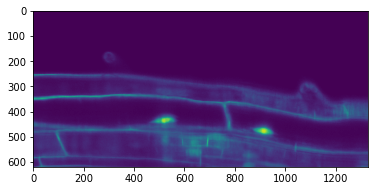

In [61]:
plt.imshow(data[200, :, :])
plt.show()

#### Rotate

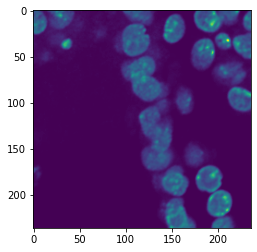

In [28]:
data_xy = np.swapaxes(data[0, :, :],0,1)
plt.imshow(data_xy)
plt.show()

### LEER NII FILE

In [21]:
img_crop = nib.load(crop_0).get_fdata()
img_crop.shape

(236, 236, 202)

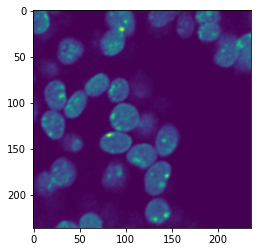

In [29]:
plt.imshow(img_crop[:,:,100])
plt.show()

In [40]:
fp = h5py.File(seg_0, 'r')
list(fp.keys())

['exported_data']

In [41]:
dataP= np.array(fp["exported_data"])
dataP.shape

(1, 202, 236, 236, 1)

In [42]:
dataP = dataP[0,:,:,:,0]
dataP.shape

(202, 236, 236)

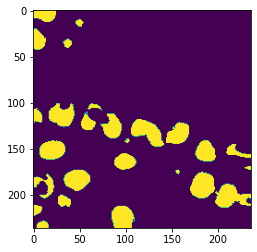

In [44]:
plt.imshow(dataP[0,:,:])
plt.show()

In [6]:

# https://osf.io/nk9em/

## LEER DATA PYTORCH 3D UNET

In [3]:
f = "/Users/dvarelat/Documents/MASTER/TFM/methods/pytorch3dunet/N_294_final_crop_ds2.h5"
f_pred = "/Users/dvarelat/Documents/MASTER/TFM/methods/pytorch3dunet/N_294_final_crop_ds2_predictions.h5"
nuclei =  "/Users/dvarelat/Documents/MASTER/TFM/methods/pytorch3dunet/t00015_s01_uint8_cropped_gt.h5" 

In [4]:
fr = h5py.File(nuclei, 'r')

In [5]:
list(fr.keys())

['label', 'label_uint16', 'label_uint16_smooth', 'raw']

In [6]:
label = np.array(fr["label"])

In [20]:
label_with_ignore = np.array(fr["label_with_ignore"])

In [50]:
data= np.array(fr["raw"])
data.shape

(486, 600, 1000)

In [49]:
type(data[0,0,0])

numpy.uint8

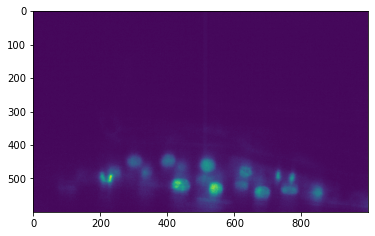

In [22]:
data_s = data[240,:,:]
data_s.shape
plt.imshow(data_s)
plt.show()

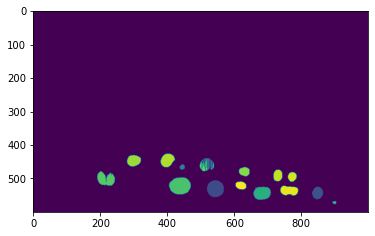

In [24]:
plt.imshow(label[240,:,:])
plt.show()


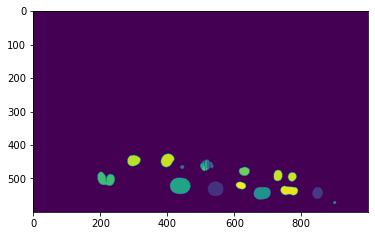

In [26]:
plt.imshow(fr["label_uint16_smooth"][240,:,:])
plt.show()


In [46]:
np.unique(fr["label_uint16_smooth"]) 

array([  0,   1,   2,   4,  10,  12,  37,  38,  52,  64,  72,  88, 125,
       129, 131, 154, 158, 177, 178, 185, 189, 191, 201, 223, 236, 251,
       254, 303, 313, 341, 342, 395, 402, 404, 406, 423, 436, 437, 452,
       460, 465, 468, 470, 515, 519, 521, 522, 524, 529, 533, 536, 545,
       555, 577, 581, 583, 585, 668, 669, 673, 676, 678, 682, 684, 686,
       698, 702, 703, 704], dtype=uint16)

In [47]:
np.unique(fr["label_uint16"]) 

array([  1,   2,   4,  10,  12,  37,  38,  52,  64,  72,  88, 125, 129,
       131, 154, 158, 177, 178, 185, 189, 191, 201, 223, 236, 251, 254,
       303, 313, 341, 342, 395, 402, 404, 406, 423, 436, 437, 452, 460,
       465, 468, 470, 515, 519, 521, 522, 524, 529, 533, 536, 545, 555,
       577, 581, 583, 585, 668, 669, 673, 676, 678, 682, 684, 686, 698,
       702, 703, 704], dtype=uint16)

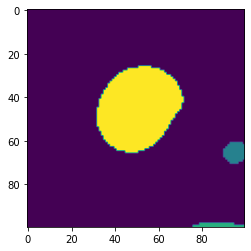

In [42]:
plt.imshow(fr["label_uint16_smooth"][240,400:500,350:450])
plt.show()


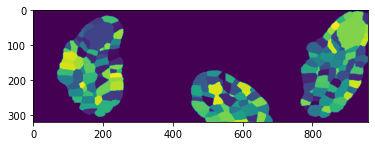

In [33]:
plt.imshow(label_with_ignore[:,:,100])
plt.show()

### PREDICTIONS their data

In [34]:

PRED = h5py.File(f_pred, 'r')
list(PRED.keys())

['predictions']

In [35]:
predictions = np.array(PRED["predictions"])

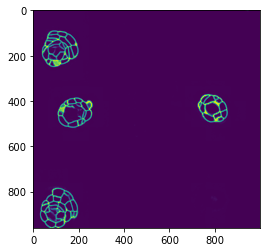

In [40]:
plt.imshow(predictions[0,100,:,:])
plt.show()

In [1]:
file_path  = '/Users/dvarelat/Documents/MASTER/TFM/methods/pytorch3dunet/crop0_zyx_predictions.h5'
h5_created = h5py.File(file_path, 'r')

NameError: name 'h5py' is not defined

In [50]:
list(h5_created.keys())

['predictions']

In [53]:
h5_created_predictions = np.array(h5_created["predictions"])
h5_created_predictions.shape

(1, 202, 236, 236)

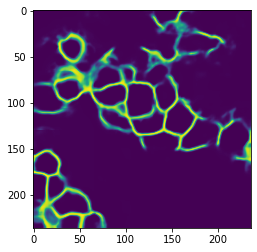

In [54]:
plt.imshow(h5_created_predictions[0,100,:,:])
plt.show()